In [4]:
from keras.datasets.mnist import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = load_data()

In [6]:
print("訓練資料維度", x_train.shape)
print("測試資料維度", x_test.shape)

訓練資料維度 (60000, 28, 28)
測試資料維度 (10000, 28, 28)


ANS: 0


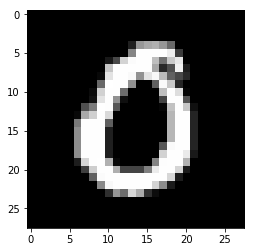

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print("ANS:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [12]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,105,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,237,59,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,200,230,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,79,240,28,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,8,...,97,72,41,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,104,...,199,38,0,0,0,0,0,0,0,0


In [15]:
# 整理一下
# x進去前一定要常態化(好配合keras一開始隨機的那組weights)
# 還要攤開
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# y進去的時候要one-hot encoding 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
#show
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一個中間層, 一定要告訴多少個輸入(input_dim)
mlp.add(Dense(128, input_dim=784, activation="relu"))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
